In [1]:
import sqlite3 as sql
from os.path import dirname, join

import numpy as np
import pandas.io.sql as psql
import pandas as pd

import plotly.graph_objects as go
import plotly.express as px 

import ipywidgets as widgets
from IPython.display import display
import bqplot as bq
from ipywidgets import interact, interactive, fixed, interact_manual
import datetime

%matplotlib widget
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
genders = """
Male
Female
"""

In [3]:
age_ranges = """
0-20
21-35
36-50
51-65
65-80
80+
"""

In [4]:
medicines = """
Abilify
Aerius
Amoxicilline
Cerazette
Champix
Citalopram
Concerta
Crestor
Cymbalta
Deroxat
Doxycycline
Effexor
Keppra
Levothyrox
Lexapro
Lyrica
Metformine
Methotrexate
Mirena
Paroxetine
Propranolol
Roaccutane
Seroplex
Sertraline
Simvastatine
Tahor
Tamoxifene
Tramadol
Valdoxan
"""

In [5]:
diseases = """
Acne
ADHD
Alcoholism
Allergy
Anemia
Angina pectoris
Ankylosing spondylitis
Anxiety
Apnea
Articular pain
Asthma
Attack
Autoimmune disease
Bacterial infection
Bipolar disorder / manic depressive disorder
Blisters - blisters
Breast cancer
Bronchitis
Burns
Cardiac failures
Chest Infection
Contraception
Crohn's disease
Depression
Dry Mouth
Dust mite allergy
Dysthemia disorder with ADD
Endometriosis
Epilepsy
Fibromyalgia
Graves disease
Gum infection
Hashimoto's disease
Hay fever
Headache
Heart attack
Heartbeats
Heartburn - gastric acidity
Heart problems
Heart rhythm disorder
Hernia
High cholesterol
High pulse
High tension
Hypothyroidism
Infection (wound)
Infection of the tonsils
Insomnia
Irregular menstrual cycle
Itching
IUD insertion
Jaw infection
Joint inflammation
Juvenile chronic arthritis
Leg cramps
Lyme disease - borreliosis
Manic episode
Menstruation pain
Narcolepsy
Nerve failure
Nerve pain
Obsessive Compulsive Disorder (OCD)
Osteoarthritis
Overactive thyroid gland
Otitis
Pain, general
Pneumonia
Polyneuropathy
Post-Natal Depression
Post-operative complications
Post-traumatic stress disorder
Prostate infection
Psoriatic arthritis
Psychosis
Psychic problems
Pyelonephritis
Restless legs syndrome
Return of age
Rheumatism
Rosacea
Sarcoidosis
Schizophrenia
Schizotypal disorder
Shoulder tendinitis
Side effect of another medicine
Sinusitis
Slow thyroid gland
Social phobia
Sore Throat
Spine osteoarthritis
STDs (sexually transmitted diseases)
Stomach infection
Stop smoking
Tired
Toothache
Tremors
Thyroid
Thyroid removal
Thyroid removed
Type 1 diabetes
Type 2 diabetes
Type 3 diabetes
Ulcerative colitis
Urinary tract infection
Urticaria
Vertigo - spinning
Other
"""

# <p style="text-align: center;">What are the secondary effects of medical drugs? <br>A quantitative analysis of user reviews<p>

Do you want to compare users' experiences with certain medicine? Do you want to know the secondary effects of medical drugs? Do you want to see how drugs affect users similar to you?

If you answered yes to any of these questions, you are on the right website.

We take reviews from health forum and analyse them to give you clearer insights.

*Source of data: sample of meamedica.com*

**Disclaimer: This is a prototype for a Masters Thesis, we are not medical professionals, please consult a doctor before taking prescription drugs.**<br>


## Overall View

Our data is based on 3360 reviews on 30 different drugs.

In [22]:
df = pd.read_csv("all_reviews_v2.csv", index_col=0)

### The Medical Drugs Reviewed

This is the complete list of drugs that we have user reviews on:

In [7]:
data = [['Abilify','Aerius','Amoxicilline','Cerazette','Champix'],
        ['Citalopram','Concerta','Crestor','Cymbalta','Deroxat'], 
        ['Doxycycline','Effexor','Keppra','Levothyrox','Lexapro'], 
        ['Lyrica','Metformine','Methotrexate','Mirena','Paroxetine'],
        ['Propranolol','Roaccutane','Seroplex','Sertraline','Simvastatine'], 
        ['Tahor','Tamoxifene','Tramadol','Valdoxan','Victoza']]

In [8]:
list = pd.DataFrame(data, columns = ['Medical', 'Drugs','Reviewed','by','Users'])
list

,Medical,Drugs,Reviewed,by,Users
0,Abilify,Aerius,Amoxicilline,Cerazette,Champix
1,Citalopram,Concerta,Crestor,Cymbalta,Deroxat
2,Doxycycline,Effexor,Keppra,Levothyrox,Lexapro
3,Lyrica,Metformine,Methotrexate,Mirena,Paroxetine
4,Propranolol,Roaccutane,Seroplex,Sertraline,Simvastatine
5,Tahor,Tamoxifene,Tramadol,Valdoxan,Victoza


### Population Distribution

In [9]:
df['count'] = 1
df_pyra = df.pivot_table('count', columns='gender', index='age_range', aggfunc='sum').reset_index()

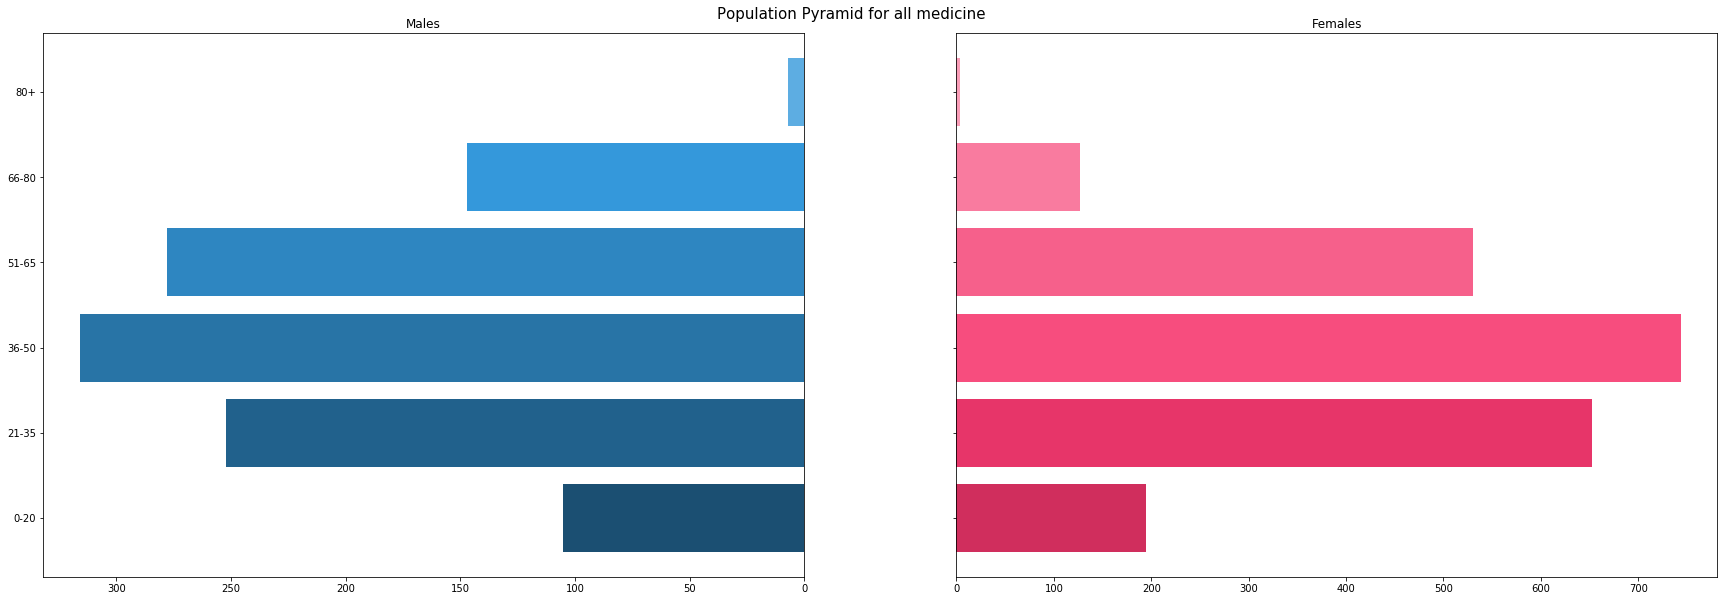

In [26]:
y = range(0, len(df_pyra))
x_male = df_pyra['Male']
x_female = df_pyra['Female']

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(30, 10))

plt.figtext(.5,.9,"Population Pyramid for all medicine ", fontsize=15, ha='center')

axes[0].barh(y, x_male, align='center', color=['#1B4F72','#21618C','#2874A6','#2E86C1','#3498DB','#5DADE2'])
axes[0].set(title='Males')
axes[1].barh(y, x_female, align='center', color=['#D02E5D','#E73569','#F74D7E','#F6608B','#F97B9F','#FA9EB8'])
axes[1].set(title='Females')

axes[0].set(yticks=y, yticklabels=['0-20','21-35','36-50','51-65','66-80','80+'])
axes[0].invert_xaxis()

plt.show()

### Secondary Effects
Users of meamedica scored the severity of secondary effects on a scale of 1 to 5 (1 being no secondary effects, 5 being very severe secondary effects)</br>
The graph below represents the average score given by users for each medicine, in our sample.

In [11]:
sc = df.groupby('medicine').mean()
sc = sc.drop(columns=['age', 'nausea','headache','fainting','vomit','depression','stomache_ache','fatigue','acne',
                      'digestive_issues','constipation','hallucinations','dizziness','total','count']).reset_index()

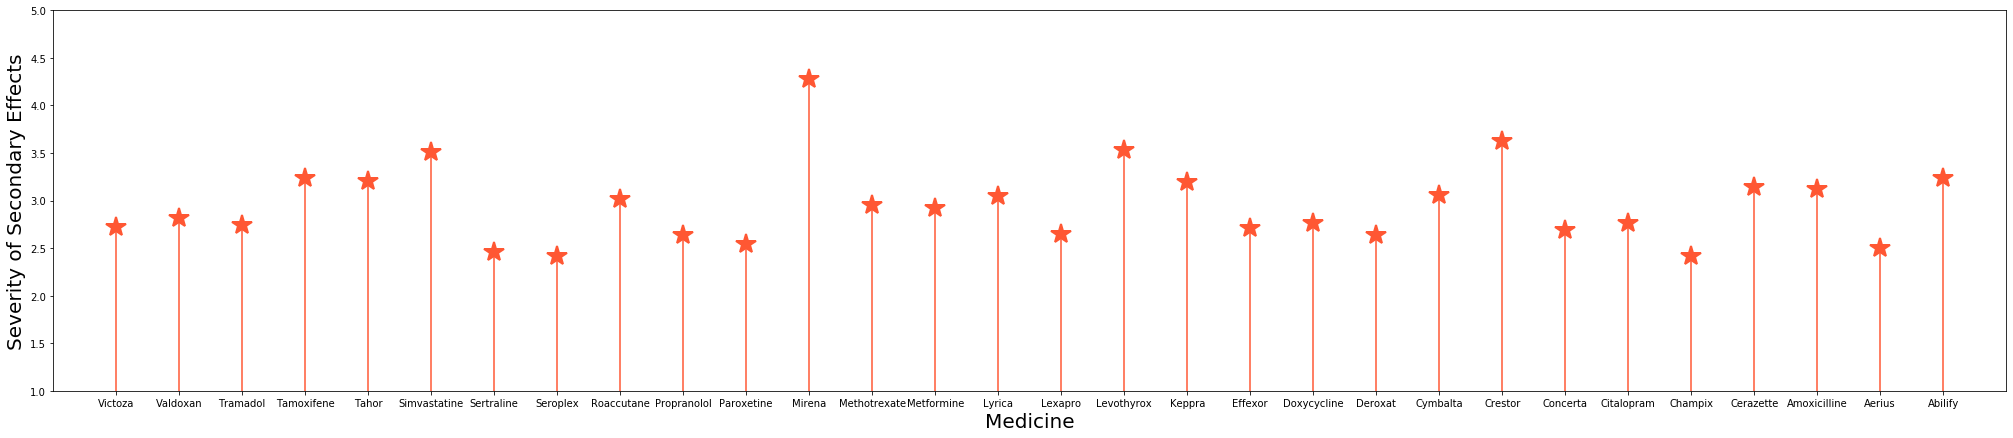

In [12]:
plt.figure(figsize=(35,7))
(markerline, stemlines, baseline) = plt.stem(sc['medicine'],
                                             sc['severity_of_secondary_effects'], use_line_collection=True)
plt.setp(markerline, marker='*', markersize=20,
         markeredgewidth=2, color='#FF5733')
plt.setp(stemlines, color='#FF5733')



plt.tick_params(labelsize=10)
plt.xlabel('Medicine', size=20)
plt.ylabel('Severity of Secondary Effects', size=20)
plt.ylim(bottom=1, top=5)
plt.xlim(left=30, right=-1)  

plt.show()

*Note: each medicine has a sample size of 112 reviews that are purely subjective.*

## Medical Drug Analysis

### <span style="color:red">Population Pyramid by Medicine & Disease</span>
Select a medicine and a disease to see the population distribution of the reviews.

In [13]:
df['count'] = 1
df_pyra = df.pivot_table('count', columns='gender', index='age_range', aggfunc='sum').reset_index()

In [14]:
def show_pyramid(medicine, disease):
    var = df.loc[(df["medicine"]==medicine)&(df["disease"]==disease)].copy()
    var['count'] = 1
    df_pyra = var.pivot_table(values = 'count', columns='gender', index='age_range', aggfunc='sum').reset_index()

    y = range(0, len(df_pyra))

    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(30, 10))

    plt.figtext(.5,.9,f"Population Pyramid for {medicine}", fontsize=15, ha='center')

    if 'Male' in df_pyra:
        x_male = df_pyra['Male']
        axes[0].barh(y, x_male, align='center', color=['#1B4F72','#21618C','#2874A6','#2E86C1','#3498DB','#5DADE2'])
    axes[0].set(title='Males')
    if 'Female' in df_pyra:
        x_female = df_pyra['Female']
        axes[1].barh(y, x_female, align='center', color=['#D02E5D','#E73569','#F74D7E','#F6608B','#F97B9F','#FA9EB8'])
    axes[1].set(title='Females')

    axes[0].set(yticks=y, yticklabels=['0-20','21-35','36-50','51-65','66-80','80+'])
    axes[0].invert_xaxis()

In [15]:
medicine = widgets.Dropdown(options=medicines.split("\n"), value="Effexor")

disease = widgets.Dropdown(options=diseases.split("\n"), value="Depression")

interact(show_pyramid, medicine=medicine, disease=disease);

interactive(children=(Dropdown(description='medicine', index=12, options=('', 'Abilify', 'Aerius', 'Amoxicilli…

### <span style="color:red">Average Scores</span>
The 4 components are ranked by users from 1 to 5.

**Efficiency of the medicine**: 1 being not efficient, 5 being very efficient.<br>
**Quantity of Secondary Effects**: 1 being no effects, 5 being many effects.<br>
**Severity of Secondary Effects**: 1 being no effects, 5 being very severe effects.<br>
**Ease of use**: 1 being complicated, 5 being very easy.

#### <span style="color:blue">Average Scores (list)</span>
This table shows the average scores given by users for the 4 factors listed above.

In [16]:
sc = df.groupby('medicine').mean()
sc = sc.drop(columns=['age', 'nausea','headache','fainting','vomit','depression','stomache_ache','fatigue','acne',
                      'digestive_issues','constipation','hallucinations','dizziness','total','count']).reset_index()
sc

,medicine,efficiency,quantity_of_secondary_effects,severity_of_secondary_effects,ease_of_use
0,Abilify,2.607143,3.482143,3.241071,4.178571
1,Aerius,3.285714,2.839286,2.500000,4.607143
2,Amoxicilline,2.776786,3.785714,3.125000,4.062500
3,Cerazette,4.196429,3.696429,3.142857,4.383929
4,Champix,4.321429,2.741071,2.419643,4.660714
5,Citalopram,3.375000,2.982143,2.758929,4.589286
6,Concerta,3.883929,3.000000,2.687500,4.580357
7,Crestor,3.000000,3.973214,3.625000,4.348214
8,Cymbalta,3.205357,3.455357,3.053571,4.250000
9,Deroxat,3.428571,3.223214,2.633929,4.455357


*Note: these values are subjective*

#### <span style="color:blue">Average Scores (filtered)</span>
This table shows the average scores given by users for efficiency, quantity of secondary effects, severity of secondary effects and ease of use filtered by medicine, disease that is being treated, gender and age range.

In [17]:
def show_scores(medicine, disease, gender, age_range):
    vars = df.loc[(df["medicine"]==medicine)&(df["disease"]==disease)&(df["age_range"]==age_range)
                  &(df["gender"]==gender)].copy()
    sc = vars.groupby('medicine').mean()
    sc = sc.drop(columns=['age', 'nausea','headache','fainting','vomit','depression','stomache_ache','fatigue','acne',
                      'digestive_issues','constipation','hallucinations','dizziness','total','count'])
    return sc.T

In [18]:
medicine = widgets.Dropdown(options=medicines.split("\n"), value="Levothyrox")

disease = widgets.Dropdown(options=diseases.split("\n"), value="Thyroid removal")

gender = widgets.Dropdown(options=genders.split("\n"), value="Male")

age_range = widgets.Dropdown(options=age_ranges.split("\n"), value="51-65")

interact(show_scores, medicine=medicine, disease=disease, gender=gender, age_range=age_range);

interactive(children=(Dropdown(description='medicine', index=14, options=('', 'Abilify', 'Aerius', 'Amoxicilli…

*Note: these values are subjective*

### <span style="color:red">Number Secondary Effects per Medicine</span>

Visualise how many users signaled one of the secondary effects listed.

**count** is the number of reviews for the selected drug.<br>
**total** is the number of reviews containing a written comment.<br>
The occurence of symptoms is based on the writen comment not the total number of reviews.<br>
**all other columns (apart from medicine)** are secondary effects*

#### <span style="color:blue">Secondary Effects per Medicine (list)</span>
This table shows the sum of secondary effects for each medicine regardless of disease it is used to treat, age range and gender.

In [19]:
symp = df.groupby('medicine').sum()
symp = symp.drop(columns=['age', 'efficiency','quantity_of_secondary_effects','severity_of_secondary_effects',
                          'ease_of_use']).reset_index()
symp

,medicine,nausea,fainting,headache,vomit,depression,fatigue,stomache_ache,digestive_issues,constipation,acne,hallucinations,dizziness,total,count
0,Abilify,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,53.0,112
1,Aerius,2.0,0.0,11.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,3.0,63.0,112
2,Amoxicilline,7.0,0.0,3.0,3.0,0.0,4.0,2.0,0.0,0.0,4.0,0.0,3.0,49.0,112
3,Cerazette,3.0,1.0,17.0,2.0,3.0,5.0,2.0,0.0,1.0,19.0,0.0,2.0,78.0,112
4,Champix,5.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,73.0,112
5,Citalopram,7.0,0.0,4.0,3.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,112
6,Concerta,0.0,0.0,6.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,79.0,112
7,Crestor,3.0,1.0,2.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,67.0,112
8,Cymbalta,6.0,0.0,2.0,3.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,55.0,112
9,Deroxat,4.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,7.0,64.0,112


**Caution**: The listed secondary effects are picked up every time that word or a synonym is mentionned. We cannot guarantee that a medicine causes that secondary effect.<br>
eg: *Roaccutane* is used to treat acne so acne is mentionned a lot<br>
eg: *Propranolol* is used to treat migraines so migraines are mentionned a lot

#### <span style="color:blue">Secondary Effects per Medicine (filtered)</span>
This table shows the sum of secondary effects for each medicine filtered by disease it is used to treat, age range and gender.

In [31]:
def show_effects(medicine, disease, gender, age_range):
    vars = df.loc[(df["medicine"]==medicine)&(df["disease"]==disease)&(df["age_range"]==age_range)
                  &(df["gender"]==gender)].copy()
    symp = vars.groupby('medicine').sum()
    symp = symp.drop(columns=['age', 'efficiency','quantity_of_secondary_effects','severity_of_secondary_effects',
                          'ease_of_use'])
    return symp.T

In [32]:
medicine = widgets.Dropdown(options=medicines.split("\n"), value="Cerazette")

disease = widgets.Dropdown(options=diseases.split("\n"), value="Contraception")

gender = widgets.Dropdown(options=genders.split("\n"), value="Female")

age_range = widgets.Dropdown(options=age_ranges.split("\n"), value="21-35")

interact(show_effects, medicine=medicine, disease=disease, gender=gender, age_range=age_range);

interactive(children=(Dropdown(description='medicine', index=4, options=('', 'Abilify', 'Aerius', 'Amoxicillin…

**Caution**: The listed secondary effects are picked up every time that word or a synonym is mentionned. We cannot guarantee that a medicine causes that secondary effect.<br>
eg: *Roaccutane* is used to treat acne so acne is mentionned a lot<br>
eg: *Propranolol* is used to treat migraines so migraines are mentionned a lot

<p style="text-align: center;">Copyright © 2021 Juliette Piccolin. All rights reserved.<p>